In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
plt.style.use('bmh')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 20,
    "axes.titlesize": 20,
    "axes.labelsize": 20,
    "font.sans-serif": ["Helvetica"],
    "axes.facecolor": '#ffffff',
    "figure.autolayout": True,
	})

# paths
data_dir = './data/'
expo_dir = './export/'
for ddir in [data_dir, expo_dir]:
  if not os.path.exists(ddir):
    os.mkdir(ddir)

def return_name_short(N,L,types):
    return 'shorttimeSP_N{:},{:},{:}_L{:}_sig1.0,1.2,0.8_MSDs_{:}_err.dat'.format(*N,L,types)
def return_name(N,L,types):
    return 'SP_N{:},{:},{:}_L{:}_sig1.0,1.2,0.8_MSDs_{:}_err.dat'.format(*N,L,types)

In [36]:
N = [243,243,243]
Ls = [13.02,12.57]
types = [1]

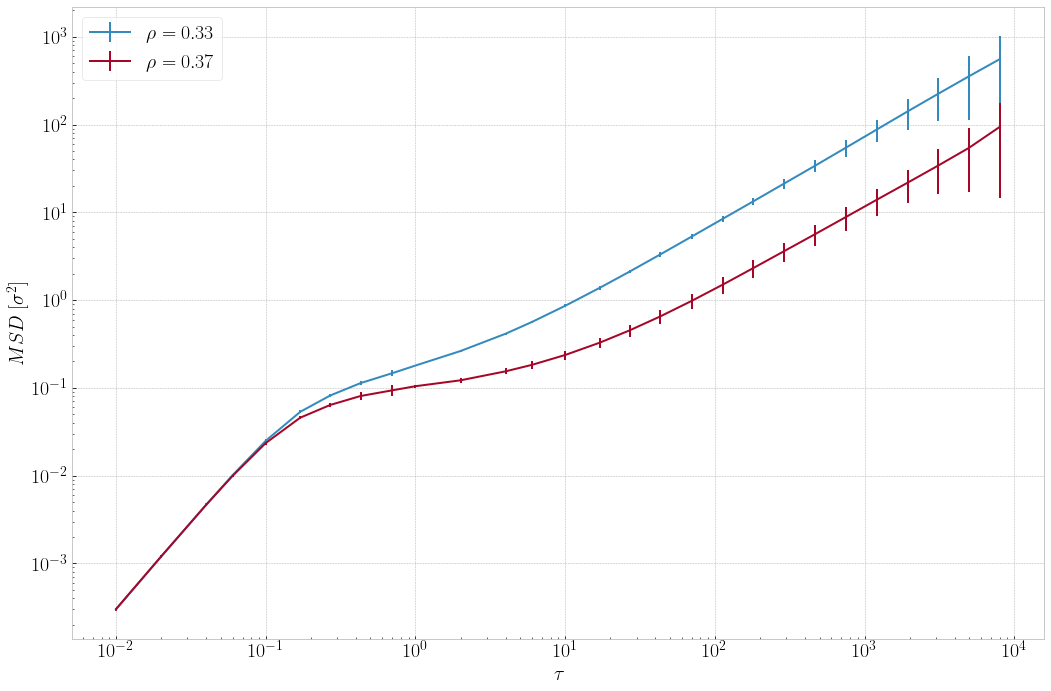

In [55]:
fig,axs = plt.subplots(1,figsize = (15,10))
for lind,L in enumerate(Ls):
    for tyind,ty in enumerate(types):
        if os.path.exists(data_dir + return_name(N,L,ty)):
            rho = np.sum(N)/L**3
            data1 = np.loadtxt(return_name_short(N,L,ty))
            data1 = data1[data1[:,0]<100,:]
            data2 = np.loadtxt(data_dir+return_name(N,L,ty))
            mask = data1[-1,0]<=data2[:,0]
            data = np.concatenate((data1,data2),axis = 0)
            #inds = np.argsort(data[:,0])
            #data = data[inds,:]
            axs.errorbar(data[:,0]*10**(-2),data[:,1],yerr=data[:,2],label = '$\\rho = {:.2f}$'.format(rho))
            axs.legend()
            axs.set_xscale('log')
            axs.set_yscale('log')
            axs.set_xlabel('$\\tau$')
            axs.set_ylabel('$MSD \ [\\sigma^2]$')
fig.savefig(expo_dir + 'shorttimemsd.pdf')
    
            